# D MNIST understanding
_5 points_

Some numbers are more difficult to predict with KNN and to cluster with K-means. 
Show why. Start with examples, and get more general


In [29]:
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score, accuracy_score

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
labels = np.where(y_train == 1)

In [12]:
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn.fit(x_train.reshape(60000, 784), y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
           weights='uniform')

In [5]:
labels[:10]

(array([    3,     6,     8, ..., 59979, 59984, 59994], dtype=int64),)

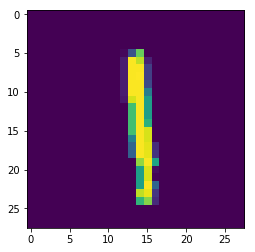

In [6]:
# pick a good picture of a "one"
_ = plt.imshow(x_train[8])

In [7]:
arr = x_train[8]
arr = arr.T
blueprint = arr[12:17]
zeros = np.zeros(28)
full_zeros = np.zeros(28)
for i in range(22):
    full_zeros = np.vstack((full_zeros, zeros))

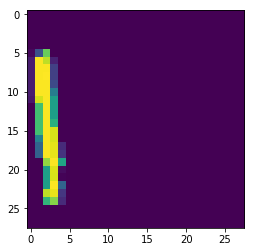

In [10]:
# shifted the "one" to the left edge
ex_1 = np.vstack((blueprint, full_zeros)).T
_ = plt.imshow(ex_1)

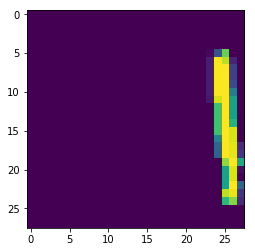

In [11]:
#shifted the one to the right edge
ex_2 = np.vstack((full_zeros, blueprint)).T
_ = plt.imshow(ex_2)

In [59]:
print("Predict left 'one': {}".format(knn.predict([ex_1.reshape([784])])))
print("Predict right 'one': {}".format(knn.predict([ex_2.reshape([784])])))
print("If both examples return a '1' they are correct!")

Predict left 'one': [1]
Predict right 'one': [1]
If both examples return a '1' they are correct!


In [13]:
predictions = knn.predict(x_test.reshape(10000, 784))

In [15]:
# f1 score of the knn model
print(f1_score(y_test, predictions, average="micro"))

0.9705


In [16]:
# error contains all indices where the predictions do not match the real labels
error = np.where(predictions != y_test)[0]

In [60]:
# looking at example images that were not identified correctly
for value in error[:5]:
    x_val = value
    print("Prediction: {}".format(knn.predict([x_test[x_val].reshape(784)])))
    print("Real value: {}".format(y_test[x_val]))
    #plt.imshow(x_test[x_val])
    #plt.show()
print("Knn Labels not recognized: {}".format(np.bincount(y_test[error])))
print("Knn Labels wrongly classified: {}".format(np.bincount(predictions[error])))

Prediction: [9]
Real value: 4
Prediction: [9]
Real value: 4
Prediction: [5]
Real value: 3
Prediction: [8]
Real value: 9
Prediction: [6]
Real value: 4
Knn Labels not recognized: [ 6  2 36 34 32 33 14 37 60 41]
Knn Labels wrongly classified: [34 50 18 37 24 30 16 36 10 40]


In [37]:
kmeans = KMeans(n_clusters=10, max_iter=100, n_jobs=-1).fit(x_train.reshape(60000, 784), y_train)

In [38]:
kmeans_predictions = kmeans.predict(x_test.reshape(10000, 784))

In [41]:
kmeans_error = np.where(kmeans_predictions != y_test)[0]
print("Kmeans labels not recognized: {}".format(np.bincount(y_test[kmeans_error])))
print("Kmeans labels wrongly classified: {}".format(np.bincount(kmeans_predictions[kmeans_error])))

Kmeans labels not recognized: [ 932 1134 1002  937  672  787  934 1027  385 1005]
Kmeans labels wrongly classified: [1266  799 1520  923 1119  742  524  496  501  925]


In [42]:
print(f1_score(y_test, kmeans_predictions, average="micro"))

0.1185


## Answer

One first idea was, that the algorithm is not able to perform a good prediction if the number is not centered in the image. The test for the two "ones" shows the opposite, therefore we can assume that the algorithm is able to predict the value independently of its position (we know that two examples are statistically  not enough, but we wanted to test out this extreme becuase the "one" is a very slim number).

Furthermore by evaluating the accuracies for the KNN model with k=3, one can see that different classes of numbers get predicted wrongly more often. For example, the label that was not recognized most was the 8, followed by the 9. This is because the images tend to look very alike and therefore errors occur!<br>
In addition, 9s and 4s are also switched sometimes, 2s and 6s look like 0s and 1s and 7s can be mixed up too. This is due to the accuracy of the image, sometimes not even a human can surely tell, which number it is (see picture below).<br>
For kmeans, many images could not be labeled correctly. This is also the case because this model is not effective for the dataset (it has a f1-score of 11% compared to 97% for the KNN model).<br>
As seen in the exercise before, some numbers have difficulties here as well, the 9 for example has no own cluster in any kmeans model. It is also frequently mispredicted (1005 values with 9s were not recognized, 925 other numbers were falsely labeled as 9s). Also the zeros, ones and twos are often mislabeled in this run, due to their similarities to other numbers.

However, it is not surprising that both models make some mistakes.
Can you surely classify the following images? :)



Real value: 6
Predicted: [0]


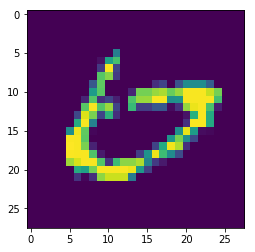

Real value: 8
Predicted: [1]


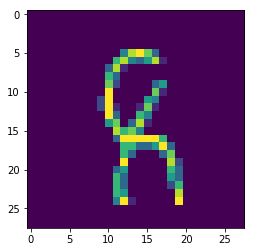

Real value: 8
Predicted: [3]


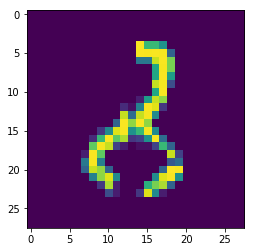

Real value: 2
Predicted: [7]


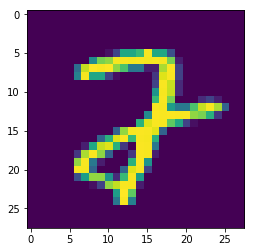

In [53]:
arr = [13, 17, 19, 20]
for i in arr:
    print("Real value: {}".format(y_test[error[i]]))
    print("Predicted: {}".format(knn.predict([x_test[error[i]].reshape(784)])))
    plt.imshow(x_test[error[i]])
    plt.show()